# Visualizando imágenes

Libreta para seguir el conjunto de imagenes que vayan saliendo para el área de estudio.

### Inicio

In [1]:
import os
os.getcwd()

'C:\\Users\\usuario\\Documents\\00-notebooks-2022'

In [2]:
# Earth Engine
import ee
ee.Initialize()

# geemap
import geemap
import geemap.colormaps as cmp # Paletas para visualización de imágenes (cm se confunde con matplotlib)

# Otras librerías
import pandas as pd
from ipywidgets import interact, fixed

# Archivos .py con funciones
from vis_tools import *

In [32]:
# Por cada cambio se necesita usar importlib.reload
import importlib # Para volver a importar el archivo funciones.py posterior a cada cambio
import sys
importlib.reload(sys.modules['vis_tools'])

<module 'vis_tools' from 'C:\\Users\\usuario\\Documents\\00-notebooks-2022\\vis_tools.py'>

### Assets y ROI

In [28]:
# Diccionario de visualización de imágenes Landsat 8 y 9 TOA
vis_rgb = {'min': 0.0, 'max': 0.3, 'bands': ['B4', 'B3', 'B2']} 

In [29]:
# Assets
asset_dept = ee.FeatureCollection('users/CesarVilca/departamentos')
asset_prov = ee.FeatureCollection('users/CesarVilca/provincias')
asset_dist = ee.FeatureCollection('users/CesarVilca/distritos')

# Filtrado
deptSelectedName = 'LAMBAYEQUE'
provSelectedName = 'FERREÑAFE' # 'FERREÑAFE' 'CHICLAYO'
distSelectedName = 'FERREÑAFE' # 'FERREÑAFE' 'CHONGOYAPE'

dept_fcol = asset_dept.filterMetadata('DEPARTAMEN', 'equals', deptSelectedName)
prov_fcol = asset_prov.filterMetadata('PROVINCIA', 'equals', provSelectedName)
dist_fcol = asset_dist.filterMetadata('DISTRITO', 'equals', distSelectedName)

# ROI Caja
roi = dist_fcol.geometry().bounds()

empty = ee.Image().paint(dist_fcol, 2,2)
empty2 = ee.Image().paint(roi, 2, 2)

In [5]:
# Visualización
Map = geemap.Map(layer_ctrl = True) 
Map.centerObject(dist_fcol, 9)

Map.addLayer(dept_fcol, {'color':'red'}, f'Departamento {deptSelectedName}')
Map.addLayer(prov_fcol, {'color':'green'}, f'Provincia {provSelectedName} ')
Map.addLayer(dist_fcol, {'color':'blue'}, f'Distrito {distSelectedName}')

# Bordes
Map.addLayer(empty , {}, 'Distrito Seleccionado')
Map.addLayer(empty2, {}, 'Limites')

Map

Map(center=[-6.6205221157277006, -79.79111975903714], controls=(WidgetControl(options=['position', 'transparen…

In [30]:
ruta_ferrenafe = r'files/Ferreñafe_areas.shp' # en Local
# ruta_ferrenafe = r'/content/Ferreñafe_areas.shp' # en Colab

predios_agricolas = geemap.shp_to_ee(ruta_ferrenafe)
predios_vis = ee.Image().byte().paint(predios_agricolas, 1, 1) # Para visualización con geemap

predios_bound = predios_agricolas.geometry().bounds()
predios_bound_vis = ee.Image().byte().paint(predios_bound, 1, 1) # Para visualización con geemap

type(predios_agricolas)

ee.featurecollection.FeatureCollection

In [31]:
# Filtrado
path = 10
row = 65 # 64

fecha = '2021-12'
meses = 6

### Landsat 8 y 9

In [41]:
tier = 'T1_TOA'
snippet_name = f"LANDSAT/LC08/C02/{tier}"

# Generando L9 raw

icol_l9 = (
    ee.ImageCollection(f'LANDSAT/LC09/C02/{tier}')
    .filterDate(fecha, ee.Date(fecha).advance(meses, 'month'))
    .filterMetadata('WRS_PATH', 'equals', path)
    .filterMetadata('WRS_ROW', 'equals', row)
)

reporteL9_raw = generar_reporte(icol_l9).sort_values('Fecha Corta')

# Generando L8 raw

icol_l8 = (
    ee.ImageCollection(f'LANDSAT/LC08/C02/{tier}')
    .filterDate(fecha, ee.Date(fecha).advance(meses, 'month'))
    .filterMetadata('WRS_PATH', 'equals', path)
    .filterMetadata('WRS_ROW', 'equals', row)
)

reporteL8_raw = generar_reporte(icol_l8)

# Concatenar DataFrames
df_l8_l9 = pd.concat([reporteL9_raw, reporteL8_raw])

# Ordenar fechas
df_l8_l9 = df_l8_l9.sort_values('Fecha Corta') # De mayor a menor usar: ,ascending=False

df_l8_l9 = df_l8_l9.reset_index(drop=True)
df_l8_l9

ID GEE           Fecha Precisa  \
0   LANDSAT/LC08/C02/T1_TOA/LC08_010065_20211204 2021-12-04 10:28:39.679   
1   LANDSAT/LC09/C02/T1_TOA/LC09_010065_20211212 2021-12-12 10:28:36.901   
2   LANDSAT/LC08/C02/T1_TOA/LC08_010065_20211220 2021-12-20 10:28:37.250   
3   LANDSAT/LC09/C02/T1_TOA/LC09_010065_20211228 2021-12-28 10:28:35.288   
4   LANDSAT/LC08/C02/T1_TOA/LC08_010065_20220105 2022-01-05 10:28:32.585   
5   LANDSAT/LC09/C02/T1_TOA/LC09_010065_20220113 2022-01-13 10:28:31.598   
6   LANDSAT/LC08/C02/T1_TOA/LC08_010065_20220121 2022-01-21 10:28:28.991   
7   LANDSAT/LC09/C02/T1_TOA/LC09_010065_20220129 2022-01-29 10:28:34.396   
8   LANDSAT/LC08/C02/T1_TOA/LC08_010065_20220206 2022-02-06 10:28:25.404   
9   LANDSAT/LC09/C02/T1_TOA/LC09_010065_20220214 2022-02-14 10:28:30.097   
10  LANDSAT/LC08/C02/T1_TOA/LC08_010065_20220222 2022-02-22 10:28:19.582   
11  LANDSAT/LC09/C02/T1_TOA/LC09_010065_20220302 2022-03-02 10:28:18.905   
12  LANDSAT/LC08/C02/T1_TOA/LC08_010065_20220310 2022-03-10 10:28:16.344   
13  LANDSAT/LC09/C02/T1_TOA/LO09_010065_20220318 2022-03-18 10:28:18.136   
14  LANDSAT/LC08/C02/T1_TOA/LC08_010065_20220326 2022-03-26 10:28:05.040   
15  LANDSAT/LC09/C02/T1_TOA/LC09_010065_20220403 2022-04-03 10:28:14.419   
16  LANDSAT/LC08/C02/T1_TOA/LC08_010065_20220411 2022-04-11 10:28:07.262   
17  LANDSAT/LC09/C02/T1_TOA/LC09_010065_20220419 2022-04-19 10:28:04.859   
18  LANDSAT/LC08/C02/T1_TOA/LC08_010065_20220427 2022-04-27 10:28:03.632   
19  LANDSAT/LC09/C02/T1_TOA/LC09_010065_20220505 2022-05-05 10:28:00.205   

   Fecha Corta   Año  Mes  Día  Día Juliano  CLOUD_COVER  SUN_ELEVATION  
0   2021-12-04  2021   12    4          338        41.76      61.231303  
1   2021-12-12  2021   12   12          346        46.70      60.112699  
2   2021-12-20  2021   12   20          354        67.62      59.196546  
3   2021-12-28  2021   12   28          362        83.58      58.451368  
4   2022-01-05  2022    1    5            5        42.07      57.964139  
5   2022-01-13  2022    1   13           13        32.94      57.699672  
6   2022-01-21  2022    1   21           21        37.22      57.678164  
7   2022-01-29  2022    1   29           29        21.12      57.843961  
8   2022-02-06  2022    2    6           37        52.05      58.152624  
9   2022-02-14  2022    2   14           45        88.04      58.557032  
10  2022-02-22  2022    2   22           53        38.32      58.952708  
11  2022-03-02  2022    3    2           61        79.20      59.298935  
12  2022-03-10  2022    3   10           69        29.20      59.460507  
13  2022-03-18  2022    3   18           77        24.91      59.452818  
14  2022-03-26  2022    3   26           85        93.24      59.135712  
15  2022-04-03  2022    4    3           93         4.83      58.593494  
16  2022-04-11  2022    4   11          101        76.52      57.728182  
17  2022-04-19  2022    4   19          109        39.91      56.710050  
18  2022-04-27  2022    4   27          117        63.67      55.501527  
19  2022-05-05  2022    5    5          125        42.47      54.184283

In [7]:
# Guardar dataframe
# df_l8_l9.to_csv('reporte-L8_L9.csv', index=False, encoding='utf-8-sig')

In [37]:
# Imagenes totales (Landsat 8 y 9)
icol_l9.merge(icol_l8).size().getInfo()

20

In [10]:
# Exportar csv
# df_l8_l9.to_csv('df_l8_l9.csv', index=False, encoding='utf-8-sig')

In [38]:
df_reporte = df_l8_l9
  
# Visualizar imágenes por mes
mes = df_reporte['Mes'].unique().tolist()
interact(ver_imgs_mensual, 
         mes=mes, 
         snippet_name =fixed(snippet_name), 
         df=fixed(df_reporte), 
         roi=fixed(predios_agricolas));

interactive(children=(Dropdown(description='mes', options=(12, 1, 2, 3, 4, 5), value=12), Output()), _dom_clas…

<function vis_tools.ver_imgs_mensual(mes, df, snippet_name, roi)>

### Sentinel-2

In [8]:
# Filtrado Sentinel-2
snippet_name_s2 = 'COPERNICUS/S2'
# snippet_name_s2 = 'COPERNICUS/S2_SR'

icol_s2_sr = (
    ee.ImageCollection(snippet_name_s2)
    .filterDate(fecha, ee.Date(fecha).advance(meses, 'month'))
    .filterBounds(predios_agricolas)
)

reporteS2 = generar_reporte(icol_s2_sr)
reporteS2

ID GEE           Fecha Precisa  \
0   COPERNICUS/S2/20211202T153621_20211202T154056_... 2021-12-02 10:45:07.038   
1   COPERNICUS/S2/20211207T153619_20211207T153726_... 2021-12-07 10:45:02.453   
2   COPERNICUS/S2/20211212T153621_20211212T154103_... 2021-12-12 10:45:06.775   
3   COPERNICUS/S2/20211217T153609_20211217T153742_... 2021-12-17 10:45:01.362   
4   COPERNICUS/S2/20211222T153621_20211222T154116_... 2021-12-22 10:45:08.640   
5   COPERNICUS/S2/20211227T153619_20211227T153744_... 2021-12-27 10:45:03.076   
6   COPERNICUS/S2/20220101T153621_20220101T154106_... 2022-01-01 10:45:09.178   
7   COPERNICUS/S2/20220106T153619_20220106T153727_... 2022-01-06 10:45:03.572   
8   COPERNICUS/S2/20220111T153621_20220111T154058_... 2022-01-11 10:45:08.654   
9   COPERNICUS/S2/20220116T153619_20220116T153730_... 2022-01-16 10:45:03.128   
10  COPERNICUS/S2/20220121T153621_20220121T153934_... 2022-01-21 10:45:07.445   
11  COPERNICUS/S2/20220126T153619_20220126T153649_... 2022-01-26 10:45:01.518   
12  COPERNICUS/S2/20220131T153621_20220131T153814_... 2022-01-31 10:45:07.558   
13  COPERNICUS/S2/20220205T153619_20220205T153613_... 2022-02-05 10:45:01.885   
14  COPERNICUS/S2/20220215T153609_20220215T153612_... 2022-02-15 10:45:01.233   
15  COPERNICUS/S2/20220220T153621_20220220T153621_... 2022-02-20 10:45:09.286   
16  COPERNICUS/S2/20220225T153619_20220225T153614_... 2022-02-25 10:45:03.207   
17  COPERNICUS/S2/20220302T153621_20220302T153622_... 2022-03-02 10:45:11.024   
18  COPERNICUS/S2/20220307T153619_20220307T153616_... 2022-03-07 10:45:05.086   
19  COPERNICUS/S2/20220312T153621_20220312T153627_... 2022-03-12 10:45:11.545   
20  COPERNICUS/S2/20220322T153621_20220322T153622_... 2022-03-22 10:45:10.593   
21  COPERNICUS/S2/20220327T153619_20220327T154047_... 2022-03-27 10:45:04.649   
22  COPERNICUS/S2/20220401T153621_20220401T154251_... 2022-04-01 10:45:09.554   
23  COPERNICUS/S2/20220406T153619_20220406T154150_... 2022-04-06 10:45:04.341   
24  COPERNICUS/S2/20220411T153621_20220411T154026_... 2022-04-11 10:45:09.571   
25  COPERNICUS/S2/20220416T153619_20220416T153615_... 2022-04-16 10:45:02.318   
26  COPERNICUS/S2/20220421T153621_20220421T153959_... 2022-04-21 10:45:12.042   
27  COPERNICUS/S2/20220426T153609_20220426T154437_... 2022-04-26 10:45:00.909   
28  COPERNICUS/S2/20220501T153621_20220501T154228_... 2022-05-01 10:45:12.570   
29  COPERNICUS/S2/20220506T153619_20220506T153615_... 2022-05-06 10:45:03.505   
30  COPERNICUS/S2/20220511T153621_20220511T154121_... 2022-05-11 10:45:11.052   
31  COPERNICUS/S2/20220516T153619_20220516T154342_... 2022-05-16 10:45:06.732   

   Fecha Corta   Año  Mes  Día  Día Juliano  MEAN SOLAR ZENITH ANGLE  \
0   2021-12-02  2021   12    2          336                25.107220   
1   2021-12-07  2021   12    7          341                25.872739   
2   2021-12-12  2021   12   12          346                26.540952   
3   2021-12-17  2021   12   17          351                27.156068   
4   2021-12-22  2021   12   22          356                27.636708   
5   2021-12-27  2021   12   27          361                28.058020   
6   2022-01-01  2022    1    1            1                28.337002   
7   2022-01-06  2022    1    6            6                28.547772   
8   2022-01-11  2022    1   11           11                28.615786   
9   2022-01-16  2022    1   16           16                28.618463   
10  2022-01-21  2022    1   21           21                28.493805   
11  2022-01-26  2022    1   26           26                28.325681   
12  2022-01-31  2022    1   31           31                28.046918   
13  2022-02-05  2022    2    5           36                27.761155   
14  2022-02-15  2022    2   15           46                27.068043   
15  2022-02-20  2022    2   20           51                26.691215   
16  2022-02-25  2022    2   25           56                26.407371   
17  2022-03-02  2022    3    2           61                26.125321   
18  2

In [9]:
# Exportar .csv
# reporteS2.to_csv('reporte-S2.csv', index=False, encoding='utf-8-sig')

In [62]:
df_reporte = reporteS2

# Ver imágenes por mes
mes = df_reporte['Mes'].unique().tolist()
interact(ver_imgs_mensual, 
         mes=mes, 
         snippet_name =fixed(snippet_name_s2), 
         df=fixed(df_reporte), 
         roi=fixed(predios_agricolas));

interactive(children=(Dropdown(description='mes', options=(12, 1, 2, 3, 4, 5), value=12), Output()), _dom_clas…

### Histórico de imágenes Landsat y Sentinel-2

**Gráficas interactivas con plotly**

Referencias:
- [Python Figure Reference: layout](https://plotly.com/python/reference/layout/)

In [10]:
import plotly.graph_objects as go

In [51]:
# Visualización con Plotly

fig = go.Figure()

fig.add_trace(
    go.Scatter(x=reporteL8_raw['Fecha Precisa'], 
               y=reporteL8_raw['CLOUD_COVER'],
               name='LC08/C02/T1 ', 
               marker_color= 'rgba(0, 0, 0, 0.7)',
               mode='lines+markers',
               xhoverformat="%d-%m-%Y",
               hovertemplate='%{y}%',
               line = dict(width=2)
               )
    )

fig.add_trace(
    go.Scatter(x=reporteS2['Fecha Precisa'], 
               y=reporteS2['CLOUDY PIXEL PERCENTAGE'],
               name='Sentinel-2', 
               marker_color= 'rgba(0, 0, 0, 0.7)',
               mode='lines+markers',
               xhoverformat="%d-%m-%Y",
               hovertemplate='%{y:.2f}%',
               line = dict(width=2, dash='dot')
               )
    )

fig.add_trace(
    go.Scatter(x=reporteL9_raw['Fecha Precisa'], 
               y=reporteL9_raw['CLOUD_COVER'], 
               name='LC09/C02/T1', 
               marker_color= 'blue',
               mode='lines+markers', marker_size=7,
               xhoverformat="%d-%m-%Y",
               hovertemplate='%{y}%',
               line = dict(width=2)
              #  line = dict(width=2, dash='dot')
               )
    )

# fig.update_traces(mode = 'markers', marker_size=7)

# Título y hover
title_plotly = 'Imágenes LC09/C02/T1_TOA y LC08/C02/T1'

fig.update_layout(
    plot_bgcolor = "white",
    width = 800,
    height = 400,
    hovermode="x unified",
    title = title_plotly,
    yaxis_range = [0,100],
#     xaxis_range = [fecha, pd.to_datetime(fecha) + relativedelta(months=meses)],
#  https://stackoverflow.com/questions/4130922/how-to-increment-datetime-by-custom-months-in-python-without-using-library
    margin=dict(t=75, b=25, l=0, r=0),
    legend=dict(x=0.27, y=-0.10),
    legend_orientation='h',
    font_family='sans-serif'
)

# Nombres en ejes
fig.update_yaxes(title_text='Nubosidad (%)',
                 showline=False, linecolor='black', mirror=True,
                 gridcolor='#7f7f7f'
)

# Obtener ticks mensuales
fig.update_xaxes(
    showline=True, 
    linecolor='black', mirror=True,
    gridcolor='#7f7f7f',
    dtick='M1', tickformat='%m-%Y'
    )

fig.show()

**Exportar gráfica como archivo `.html`**

- [Plotly: Interactive HTML Export in Python](https://plotly.com/python/interactive-html-export/)

In [52]:
# Exportar grafica como archivo html
fig.write_html('plotly.html')

### Histórico de imágenes con `cartoee`

#### Función `get_grafica_cartoee`

In [37]:
def get_grafica_cartoee(image, vis_params, title_map, label, save_fig=None):
    
    zoom_region = [-79.787761, -6.607186, -79.771781, -6.593991]

    fig = plt.figure(figsize=(8,6))

    # ee.Image a plotear
    ax = cartoee.get_map(image, region=zoom_region, vis_params=vis_params)

    # Añadir barra de color
    # https://matplotlib.org/stable/api/colorbar_api.html#module-matplotlib.colorbar   
#     cb = cartoee.add_colorbar(
#         ax, 
#         vis_params=vis_params, 
#         loc='right', 
#         label=label, 
#         posOpts=[0.86, 0.25, 0.02, 0.5]
#     )# drawedges=True, extend='both')

    # Añadir grillas
    cartoee.add_gridlines(
        ax, 
        interval=0.005, 
        ytick_rotation=90, 
        linestyle=":", 
        linewidth=0
    ) # xtick_rotation=45

    # Añadir texto
    ax.text(-79.7828, -6.5962, title_map, fontsize=14, c='black') # ,backgroundcolor='white'

    # add scale bar
    scale_bar_dict = {
          "length": 100, 
          "xy": (0.9, 0.05), 
          "linewidth": 2,
          "fontsize": 12,
          "color": "black",
          "unit": "m",
          "ha": "center",
          "va": "bottom",    
    }
    cartoee.add_scale_bar_lite(ax, **scale_bar_dict)
    
    ax.tick_params(axis = 'both', labelsize = 11)
    
    # Guardar graficas
    if save_fig != None:
        # plt.savefig(f'/Users/usuario/Downloads/{title_map}_{img_date}.jpg')
        # plt.savefig(f'/content/{title_map}_{img_date}.jpg')
        ruta = r'C:/Users/usuario/Documents/00-notebooks-2022/images/cartoee/'
        ruta_img = ruta + save_fig + '.jpg'
        plt.savefig(ruta_img)#, dpi=300)
    else:
        pass

    plt.show()

In [35]:
type(predios_vis)

ee.image.Image

In [38]:
import matplotlib.pyplot as plt
# Prueba: Cambiando estilo de fuente, default es 'sans-serif'
plt.rcParams['font.family'] = 'serif' 
# rcParams['font.family'] = 'sans-serif'

#### Imágenes Landsat 8 y 9

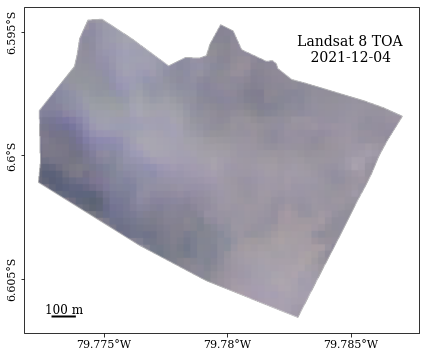

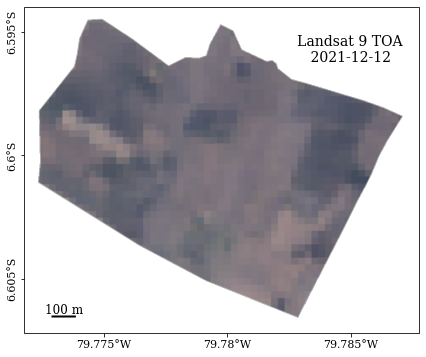

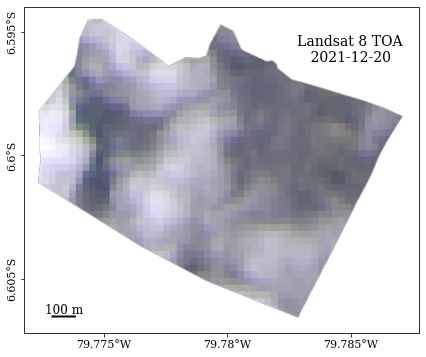

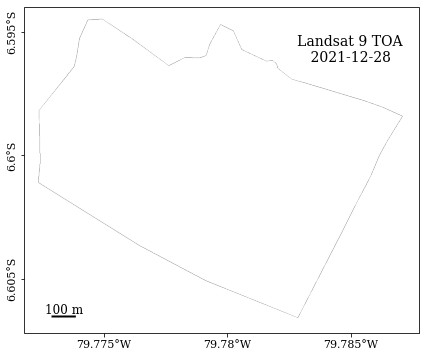

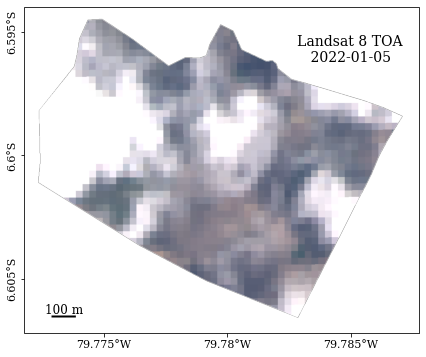

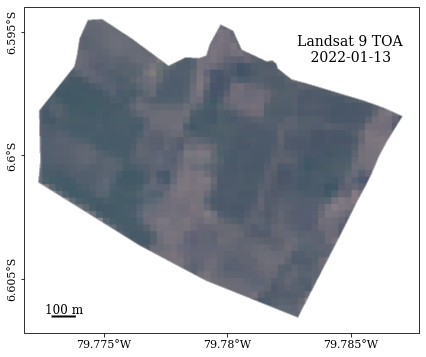

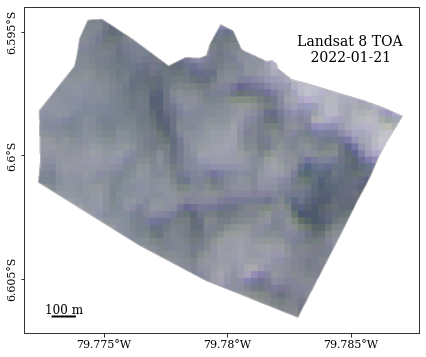

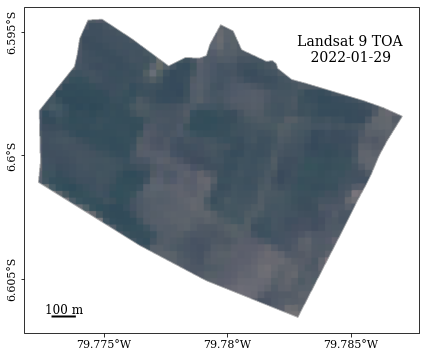

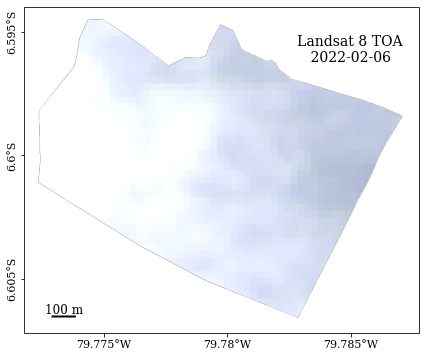

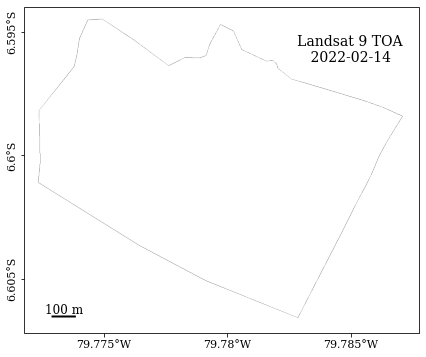

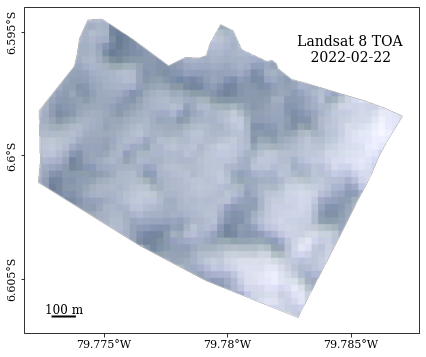

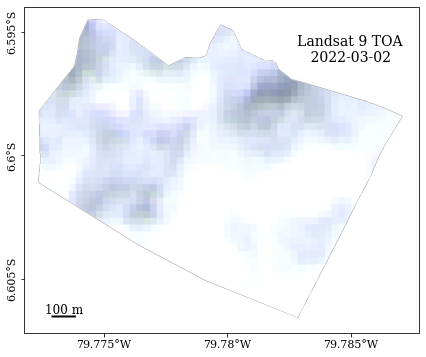

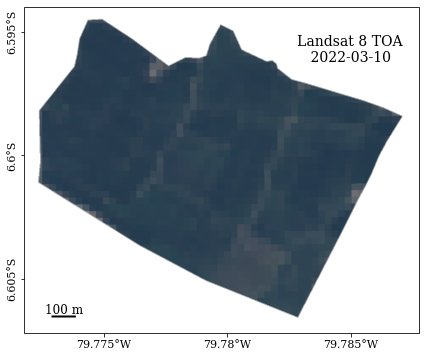

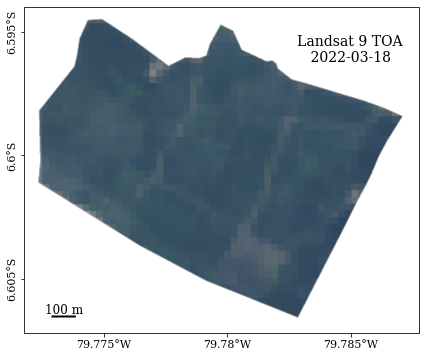

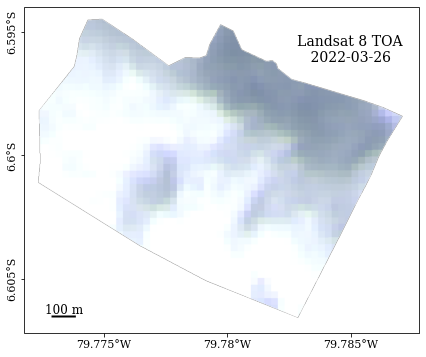

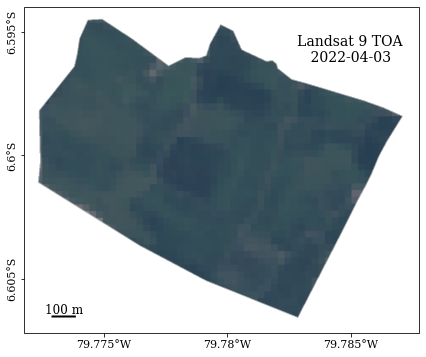

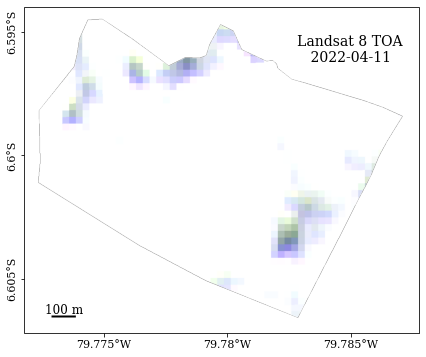

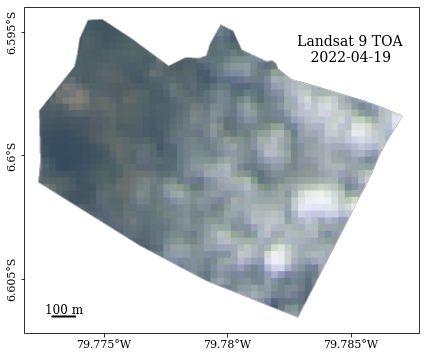

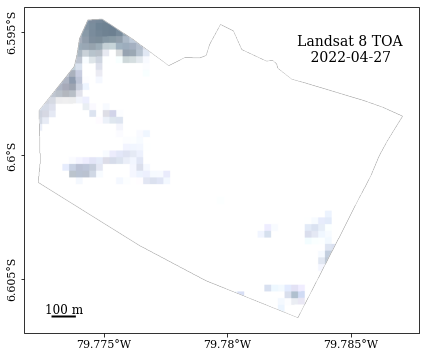

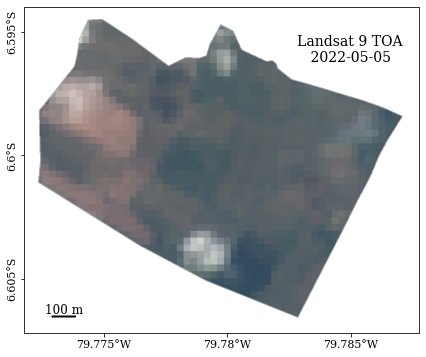

In [62]:
# Prueba
ids_lista = df_l8_l9['ID GEE'].tolist()
ids_lista

for id_img in ids_lista:
    
    img_id = id_img #df_l8_l9['ID GEE'][0]
    landsat_id = img_id[11:12]
    img_l = ee.Image(img_id)
    img_l_vis = img_l.clip(predios_agricolas).blend(predios_vis)
    img_date = img_l.date().format('YYYY-MM-dd').getInfo()
    img_id = img_l.get('system:id').getInfo()

    get_grafica_cartoee(img_l_vis, 
                        vis_rgb, 
                        f'Landsat {landsat_id} TOA\n   {img_date}','.', 
                        save_fig=f'RGB_{img_date}_L{landsat_id}')

#### Imágenes Sentinel-2

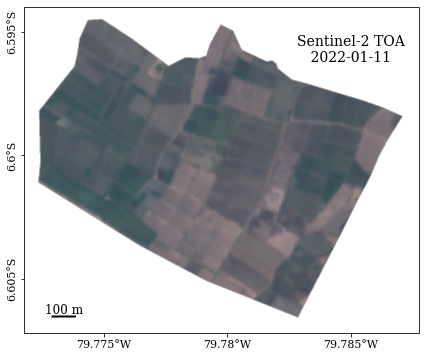

In [46]:
vis_params = {'min': 0, 'max': 0.3, 'bands': ['B4','B3','B2']}

# Prueba
img_s2_id = reporteS2['ID GEE'][2]
img_s2 = ee.Image(img_s2_id)
img_s2_vis = img_s2.multiply(0.0001).clip(predios_agricolas).blend(predios_vis)
img_date = img_s2.date().format('YYYY-MM-dd').getInfo()

get_grafica_cartoee(img_s2_vis, vis_params, f'Sentinel-2 TOA\n   {img_date}','.', save_fig=None)#f'S2_{img_date}'

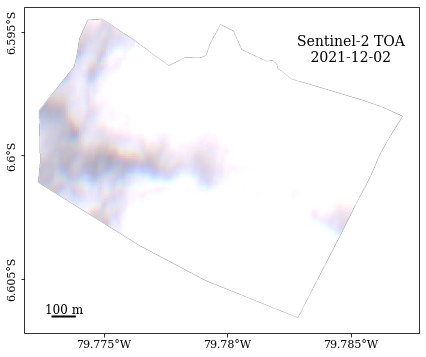

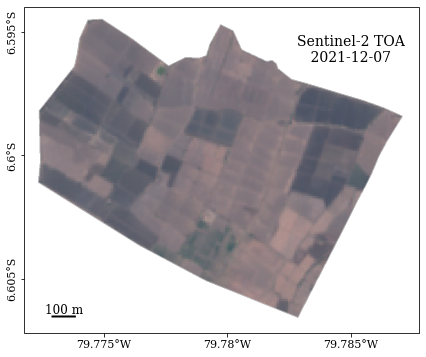

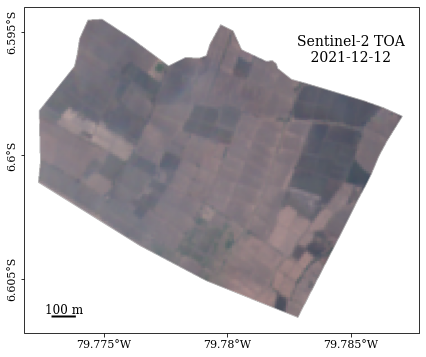

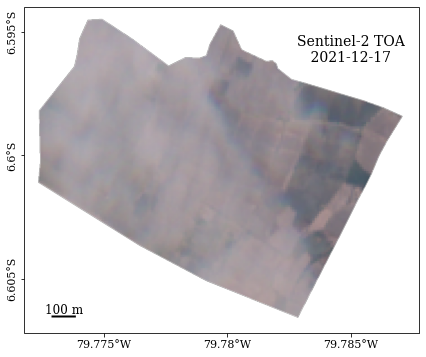

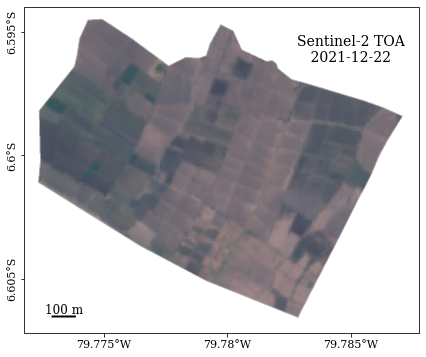

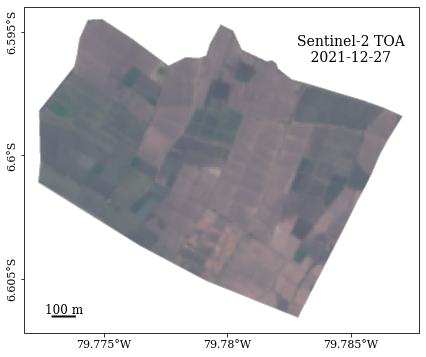

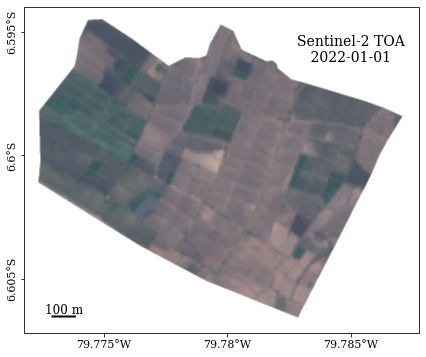

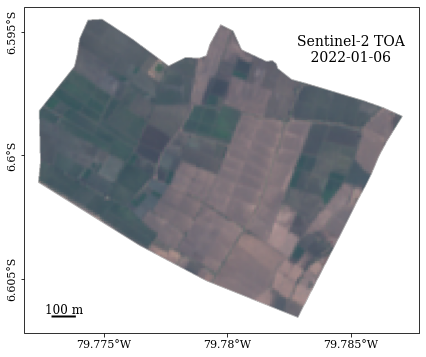

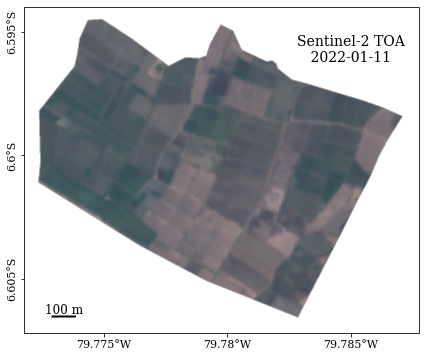

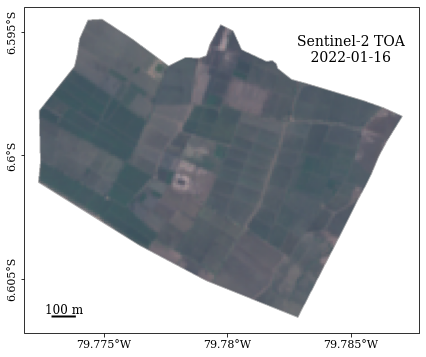

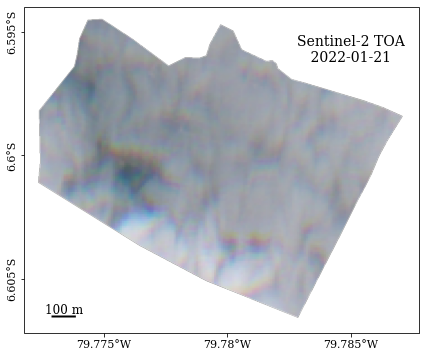

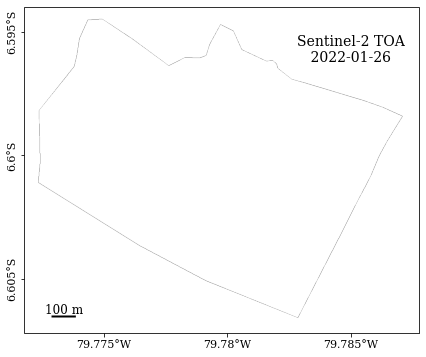

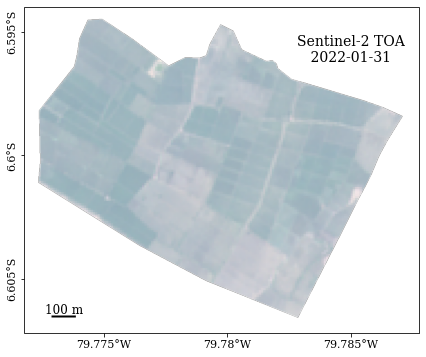

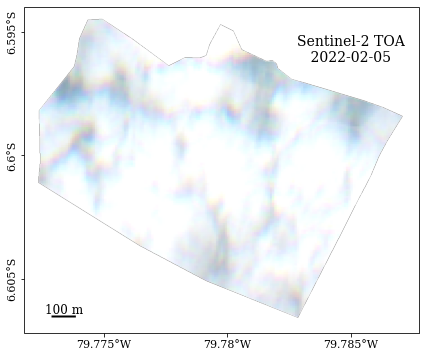

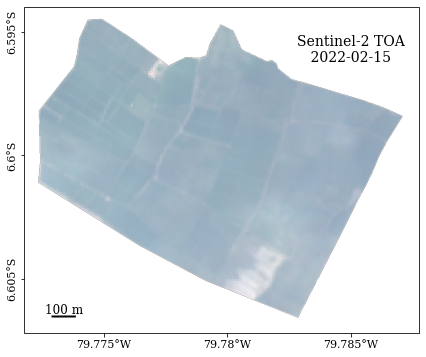

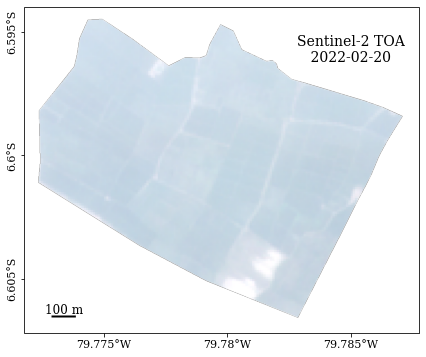

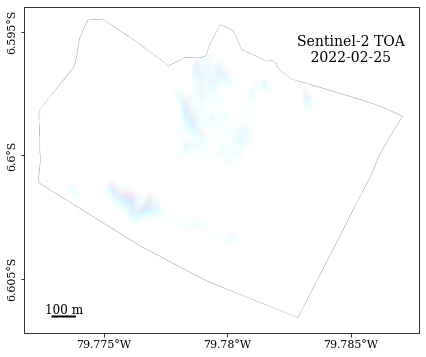

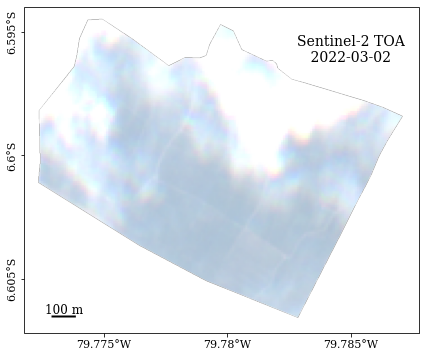

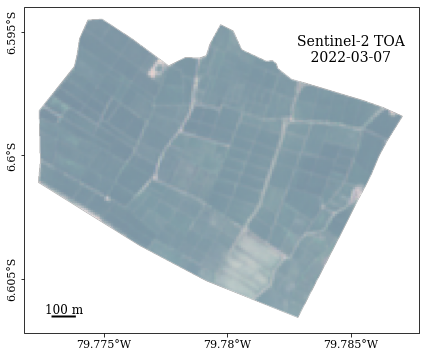

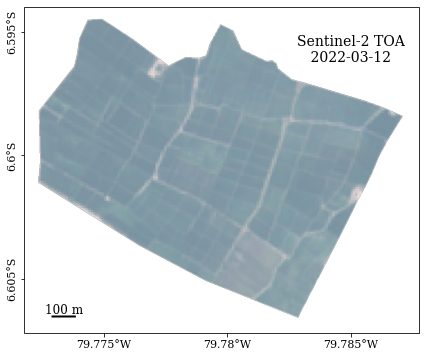

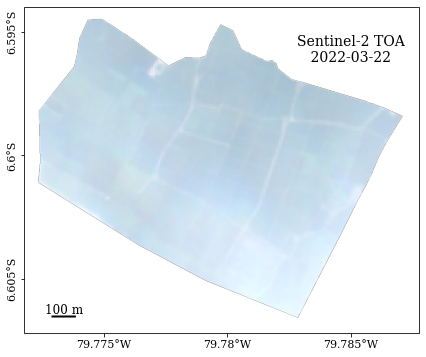

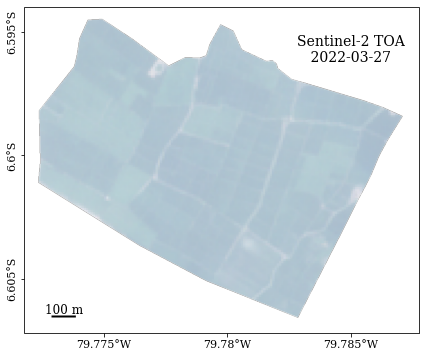

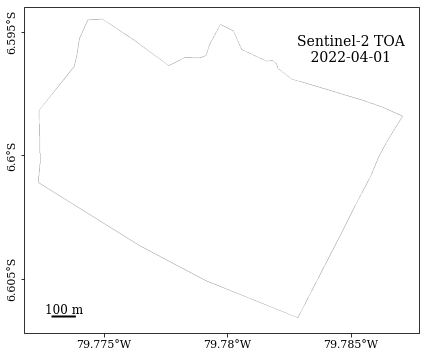

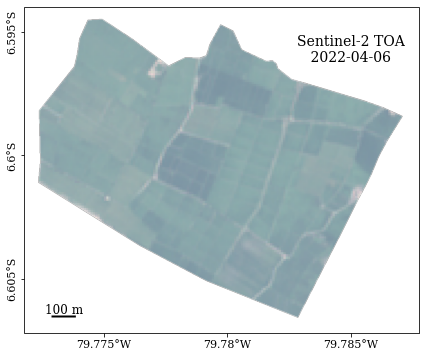

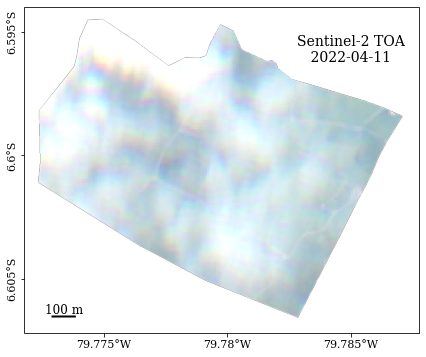

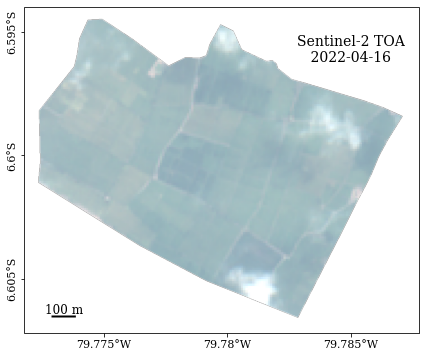

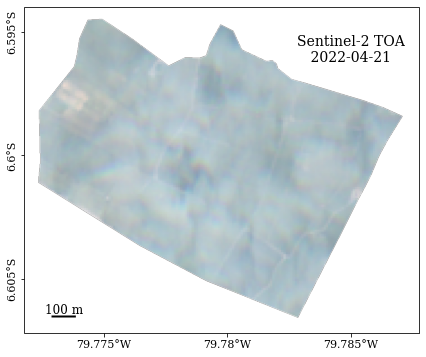

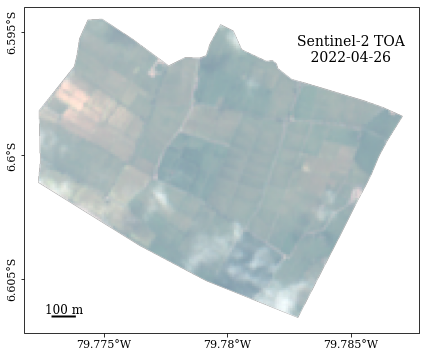

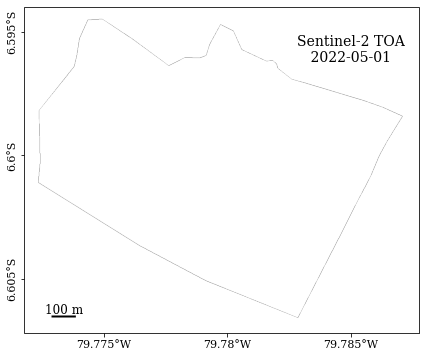

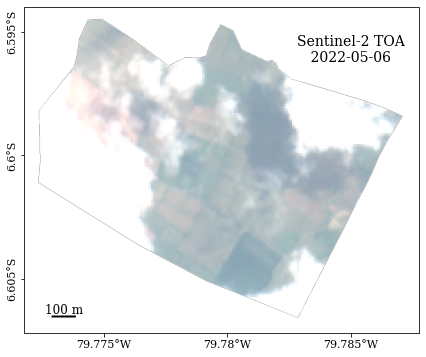

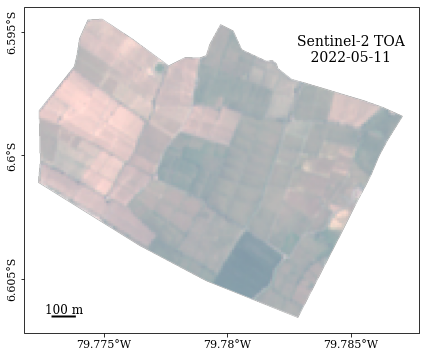

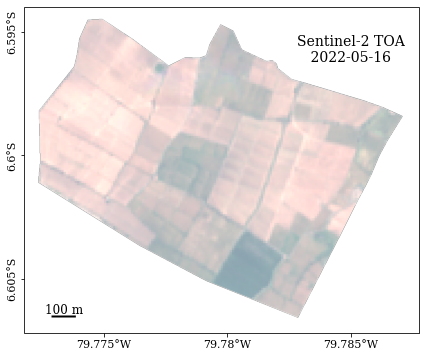

In [61]:
# Obtener gráficas para cada imagen
vis_params = {'min': 0, 'max': 0.3, 'bands': ['B4','B3','B2']}

for ids in reporteS2['ID GEE'].tolist():
    img_s2_id = ids
    img_s2 = ee.Image(img_s2_id)
    img_s2_vis = img_s2.multiply(0.0001).blend(predios_vis)
    img_date = img_s2.date().format('YYYY-MM-dd').getInfo()

    get_grafica_cartoee(img_s2_vis, vis_params, f'Sentinel-2 TOA\n   {img_date}','.', save_fig=f'S2_{img_date}')

### Pruebas

#### Prueba Ricardo

In [ ]:
# Limite
geometria_lim = ee.FeatureCollection("users/20141206/cuenca-lim-lamb");
geometria = ee.Geometry.Polygon(
        [[[-79.91132905789127, -6.5489340783904915],
          [-79.91132905789127, -6.903531592298448],
          [-79.35377290554752, -6.903531592298448],
          [-79.35377290554752, -6.5489340783904915]]])

# Filtrado Sentinel-2

icol_s2_sr = (
    ee.ImageCollection('COPERNICUS/S2')
    .filterDate('2022-01-01', '2022-05-17')
    .filterMetadata('CLOUD_COVERAGE_ASSESSMENT','less_than', 100)
    .filterBounds(geometria)
)

reporteS2 = generar_reporte(icol_s2_sr)
# reporteS2 # Reporte en DataFrame

df_reporte = reporteS2

# Ver imágenes por mes
mes = df_reporte['Mes'].unique().tolist()
interact(ver_imgs_mensual, 
         mes=mes, 
         snippet_name =fixed('COPERNICUS/S2'), 
         df=fixed(df_reporte), 
         roi=fixed(geometria_lim));

# Prueba: Visualización NDVI

ndvi_paleta = {'min':0, 'max':1, 'palette':cmp.palettes.ndvi}
visParams = {'bands': ['B4', 'B3', 'B2'], 'min':0, 'max': 0.3, 'gamma': 1};

cuenca = ee.FeatureCollection("users/20141206/cuenca-lim-lamb")
img_id = 'COPERNICUS/S2/20220106T153619_20220106T153727_T17MPN'
img_s2 = ee.Image(img_id)

image_ndvi = img_s2.normalizedDifference(['B8','B4']).clip(cuenca)

Map = geemap.Map()
Map.centerObject(img_s2, 10)
Map.addLayer(img_s2.multiply(0.0001).clip(cuenca), vis_rgb, 'Imagen S2')
Map.addLayer(image_ndvi, ndvi_paleta, 'image_ndvi')
Map.addLayer(cuenca, {}, 'table')
Map